In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [181]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', names=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of Glass'])

In [182]:
data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [183]:

data.shape

(214, 11)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [185]:
data.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

In [186]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id number, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58   

In [187]:
data.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Potassium (K) seem to have some outliers towards the top
there are many 0 values for Barioum (Ba) and Iron (Fe)





### There are 7 classes in the target, we can group them into two classes of window glass 1 and none window glass 0





In [188]:
for i in data['Type of Glass']:
  if i<5:
    data['Type of Glass'] = data['Type of Glass'].replace(i , 1)
  else:
    data['Type of Glass'] = data['Type of Glass'].replace(i , 0)

In [189]:
data['Type of Glass'].value_counts()

1    163
0     51
Name: Type of Glass, dtype: int64

The target is unbalanced and we need to balance it before modeling

we can alo drop the ID number as it will not help the modeling

In [190]:
data.drop('Id number', axis=1, inplace=True)

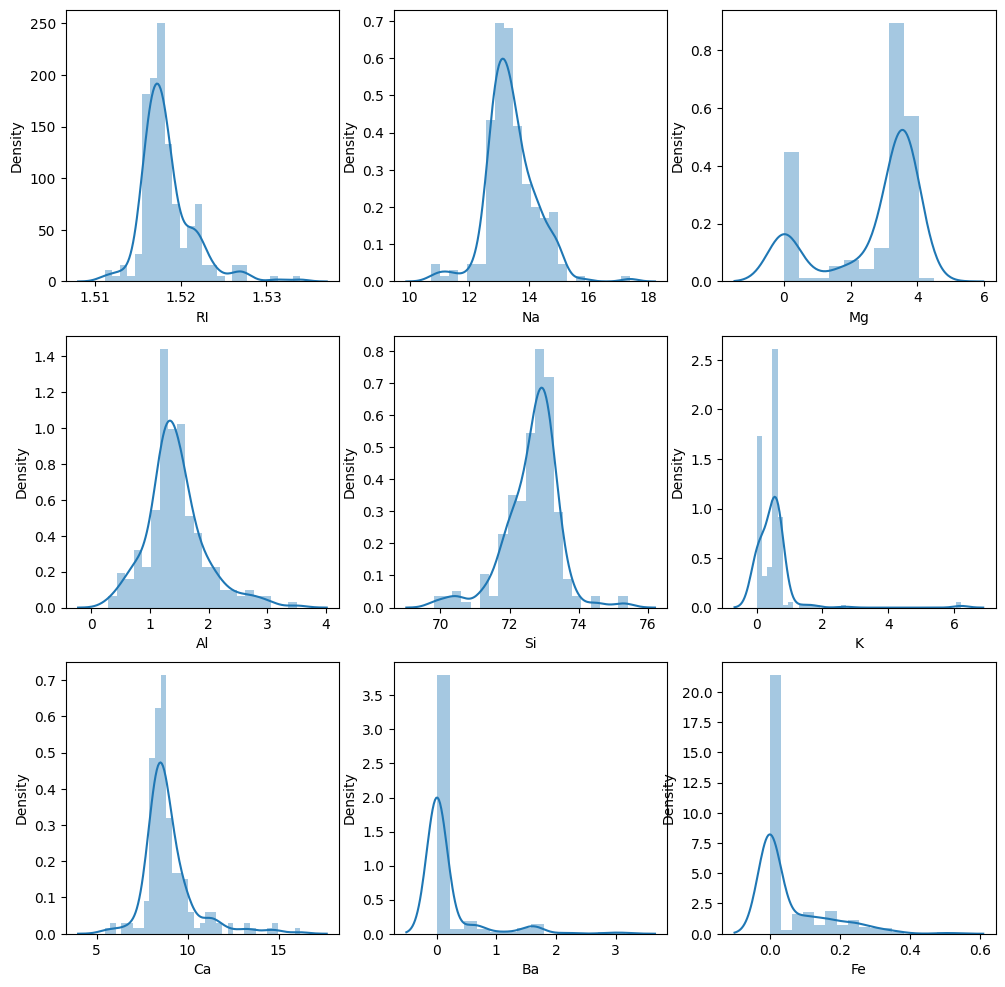

In [191]:
plt.figure(figsize = (12,12))
plotnumber = 1
for col in data.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
        plotnumber +=1

In [192]:
data.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of Glass   -1.237086
dtype: float64

In [193]:
skewed_cols = []
for i in data.columns:
    if data[i].skew()> 0.5:
        skewed_cols.append(i)

In [194]:
skewed_cols

['RI', 'Al', 'K', 'Ca', 'Ba', 'Fe']

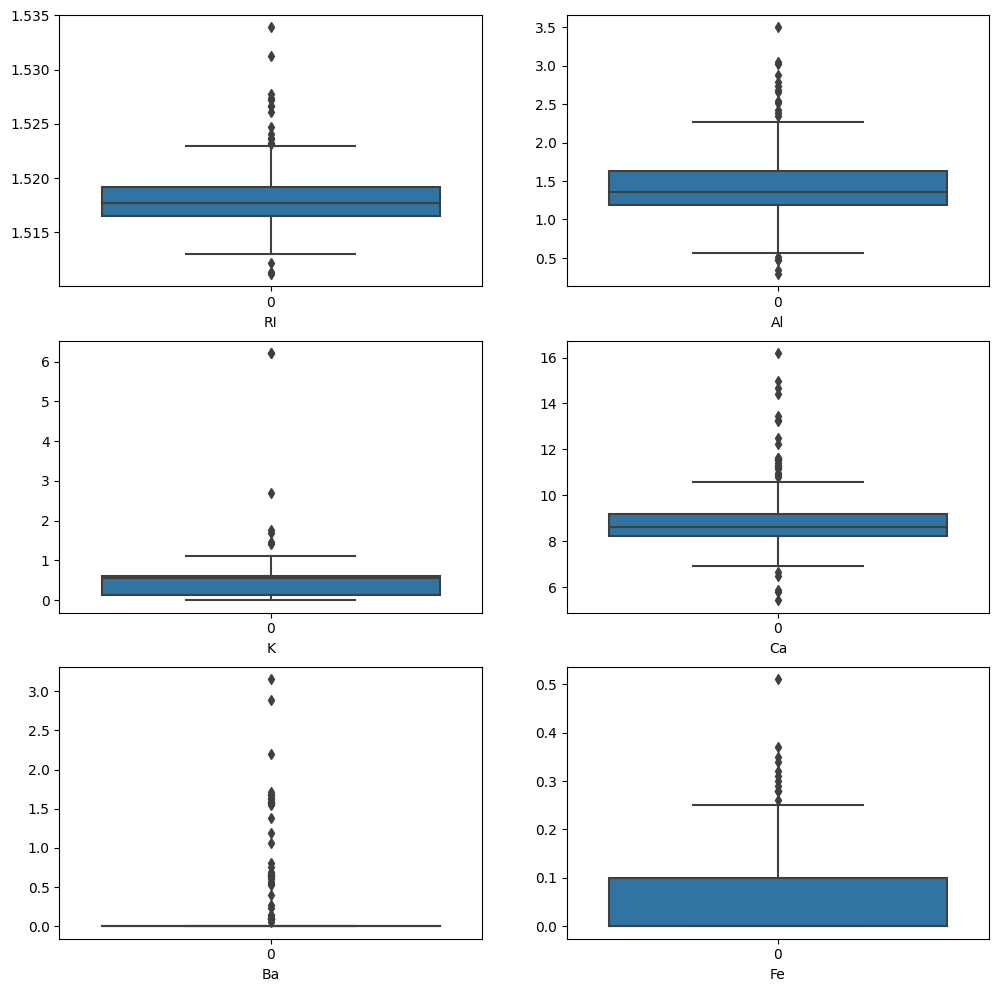

In [195]:
plt.figure(figsize = (12,12))
plotnumber = 1
for col in skewed_cols:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(data[col])
        plt.xlabel(col)
        plotnumber +=1

In [196]:
data[skewed_cols] = (data[skewed_cols]+1).apply(np.log)

In [197]:
data.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of            RI     Na    Mg        Al     Si         K        Ca        Ba  \
0    0.924660  13.64  4.49  0.741937  71.78  0.058269  2.277267  0.000000   
1    0.923310  13.89  3.60  0.858662  72.73  0.392042  2.178155  0.000000   
2    0.922742  13.53  3.55  0.932164  72.99  0.329304  2.172476  0.000000   
3    0.923330  13.21  3.69  0.828552  72.61  0.451076  2.221375  0.000000   
4    0.923235  13.27  3.62  0.806476  73.08  0.438255  2.204972  0.000000   
..        ...    ...   ...       ...    ...       ...       ...       ...   
209  0.922762  14.14  0.00  1.355835  72.61  0.076961  2.320425  0.722706   
210  0.923008  14.92  0.00  1.095273  73.06  0.000000  2.240710  0.951658   
211  0.924517  14.36  0.00  1.105257  73.42  0.000000  2.244956  0.970779   
212  0.922873  14.38  0.00  1.078410  73.61  0.000000  2.249184  0.943906   
213  0.923111  14.23  0.00  1.124930  73.36  0.000000  2.263844  0.982078   

      Fe  Ty

In [198]:
from scipy.stats import zscore
out_cols = data[skewed_cols]
z = np.abs(zscore(out_cols))

In [199]:
data1 = data[(z<3).all(axis=1)]

In [200]:
data1.shape

(195, 10)

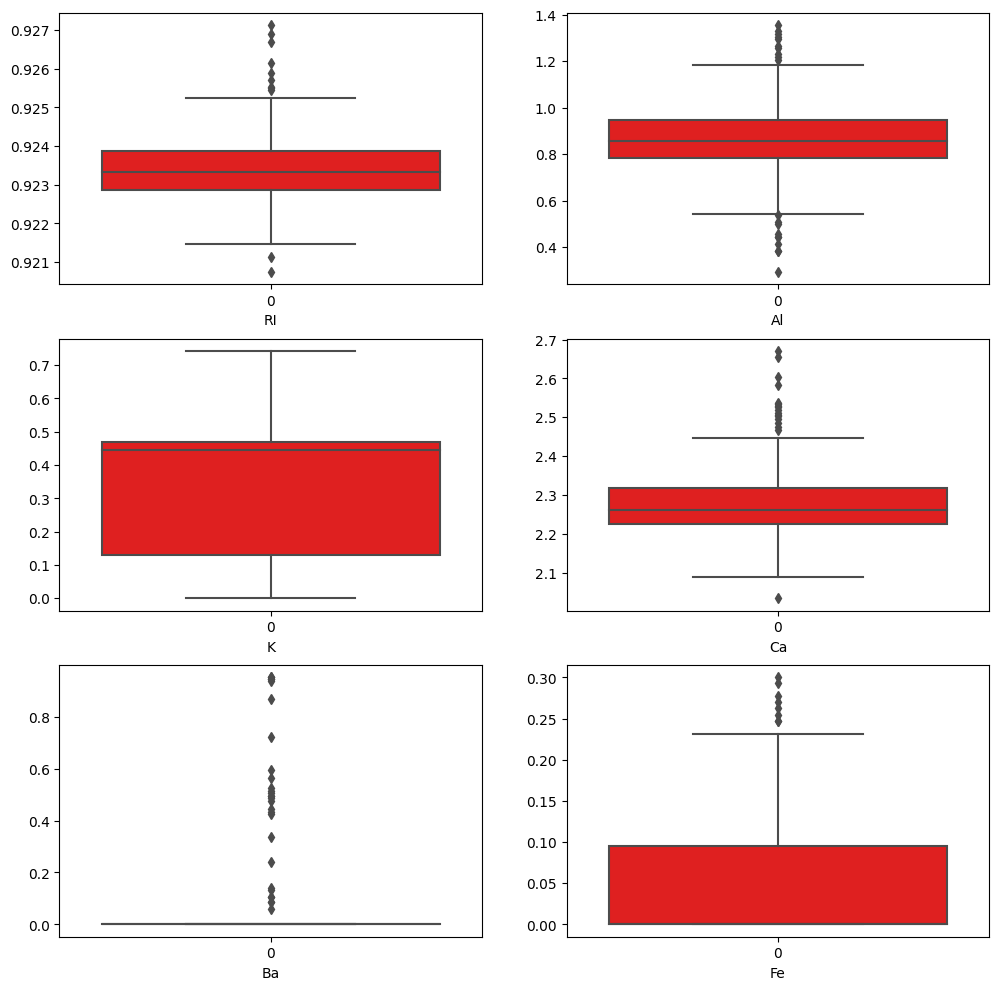

In [201]:
plt.figure(figsize = (12,12))
plotnumber = 1
for col in skewed_cols:
    if plotnumber<=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(data1[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

We managed to remove some outlier and soften the skewness a little bit, but we cannot remove more data as there are many outliers towards the top percentile for some columns and we will lose a lot of data.

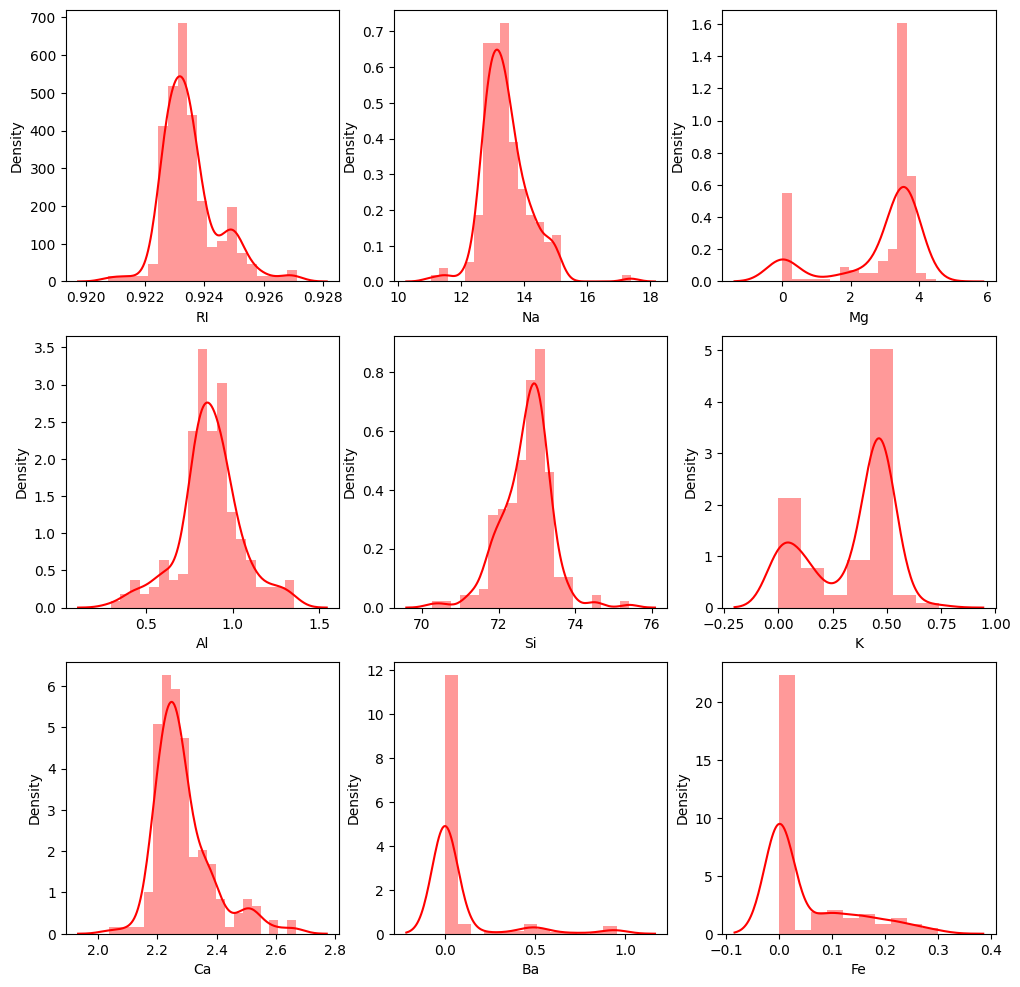

In [202]:
plt.figure(figsize = (12,12))
plotnumber = 1
for col in data1.columns:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data1[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

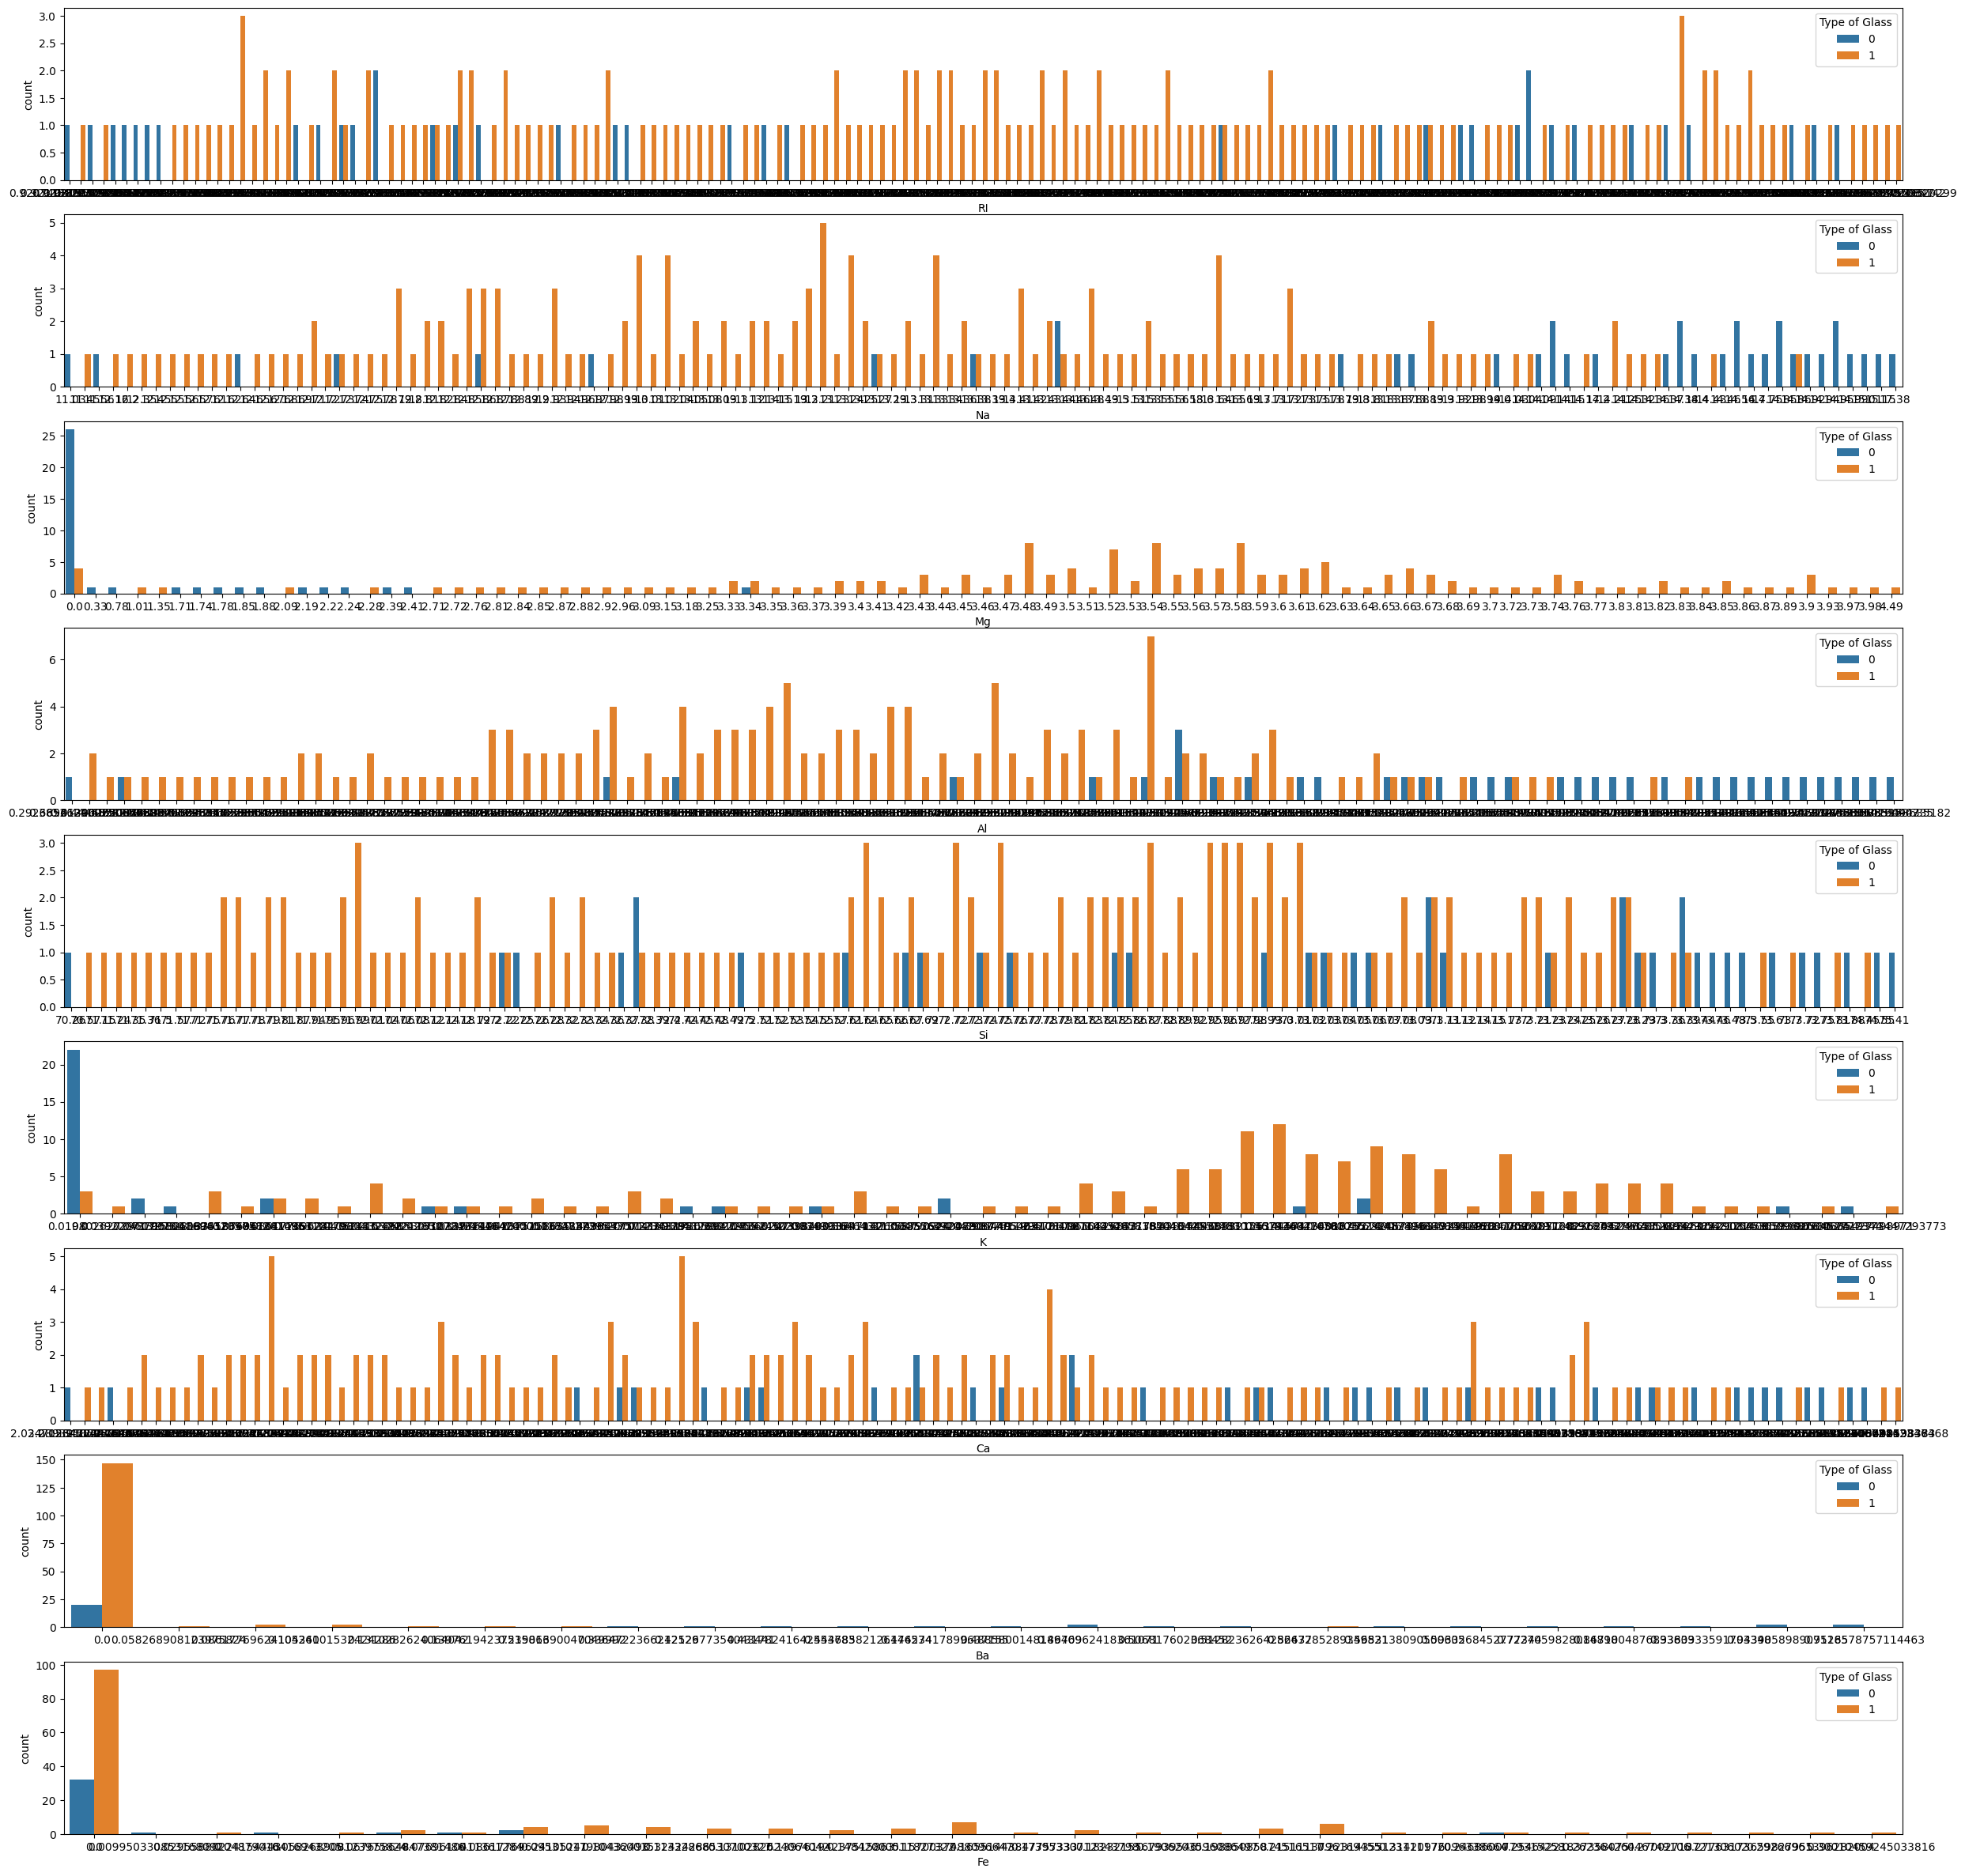

In [203]:
plt.figure(figsize = (30,30))
plotnumber = 1
for col in data1.columns:
    if plotnumber<=9:
        ax = plt.subplot(9,1,plotnumber)
        sns.countplot(x = data1[col], hue=data['Type of Glass'])
        plt.xlabel(col)
        plotnumber +=1

<Axes: >

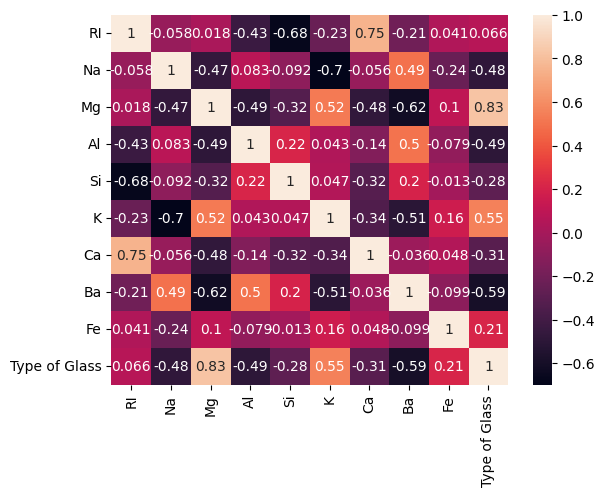

In [204]:
sns.heatmap(data1.corr(), annot = True)

All features apart from RI seem to have a good relationship with the target

There us some multicolinearity between features which we need to look into

In [205]:
x = data1.drop('Type of Glass', axis=1)
y = data1['Type of Glass']

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [209]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns

In [210]:
vif

,VIF,Features
0,6.909938,RI
1,32.758809,Na
2,84.551659,Mg
3,10.326914,Al
4,23.332336,Si
5,8.302550,K
6,60.540611,Ca
7,6.451666,Ba
8,1.111653,Fe


Mg has the highest number and then Ca both have really high numbers but we remove Ca first as Mg seem to be an important feature given the strong correlation

In [211]:
x_scaled.drop('Ca', axis=1, inplace=True)

We will also drop Ba as for most of the data it's 0 and in others it's a tiny amount, also in the heatmap it seems to have correlation with most other features.

In [212]:
x_scaled.drop('Ba', axis=1, inplace=True)

In [213]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns

In [214]:
vif

,VIF,Features
0,6.277942,RI
1,4.036711,Na
2,4.991285,Mg
3,3.229790,Al
4,5.340921,Si
5,2.832219,K
6,1.083686,Fe


Numbers are reasonable now

Before spliting the data into test and train, we need to balance the target data

In [215]:
from imblearn.over_sampling import SMOTE

In [216]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x_scaled,y)

In [217]:
y1.value_counts()

1    156
0    156
Name: Type of Glass, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [219]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [220]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  DT = DecisionTreeClassifier()
  DT.fit(x_train,y_train)
  pred = DT.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 1.0 
 Best Random State: 51


In [221]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [222]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DTpred = DT.predict(x_test)
print(accuracy_score(y_test,DTpred))
print(confusion_matrix(y_test,DTpred))
print(classification_report(y_test,DTpred))

1.0
[[52  0]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        42

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



In [225]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

1.0
[[52  0]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        42

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



In [226]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.9893617021276596
[[51  1]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        42

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



In [227]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.9787234042553191
[[52  0]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.95      0.98        42

    accuracy                           0.98        94
   macro avg       0.98      0.98      0.98        94
weighted avg       0.98      0.98      0.98        94



In [228]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

1.0
[[52  0]
 [ 0 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        42

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



In [224]:
score = cross_val_score(DT, x1,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,DTpred)-score.mean())

[0.98412698 0.98412698 0.96774194 0.82258065 0.98387097]
0.948489503328213
Difference Between score mean and accuracy score: 0.051510496671786976


In [229]:
score1 = cross_val_score(LR, x1,y1)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.98412698 0.98412698 1.         0.90322581 0.96774194]
0.9678443420378905
Difference Between score mean and accuracy score: 0.021517360089769122


In [230]:
score2 = cross_val_score(svc, x1,y1)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[1.         1.         1.         0.88709677 1.        ]
0.9774193548387096
Difference Between score mean and accuracy score: 0.001304049416609554


In [231]:
score3 = cross_val_score(GBC, x1,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.98412698 1.         0.98387097 0.83870968 1.        ]
0.9613415258576549
Difference Between score mean and accuracy score: 0.038658474142345134


In [232]:
score4 = cross_val_score(RFC, x1,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score4.mean())

[1.         1.         1.         0.87096774 1.        ]
0.9741935483870968
Difference Between score mean and accuracy score: 0.02580645161290318


In [234]:
from sklearn.model_selection import GridSearchCV

**Hypeparameter Tuning**

In [239]:
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
gscv = GridSearchCV(svc,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [240]:
gscv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [241]:
model = SVC(C= 1, gamma= 0.1, kernel= 'rbf')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9787234042553191
[[52  0]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.95      0.98        42

    accuracy                           0.98        94
   macro avg       0.98      0.98      0.98        94
weighted avg       0.98      0.98      0.98        94



In [242]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred

In [243]:
df

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,1,0
...,...,...
89,1,1
90,0,0
91,0,0
92,0,0


In [244]:
from sklearn import metrics

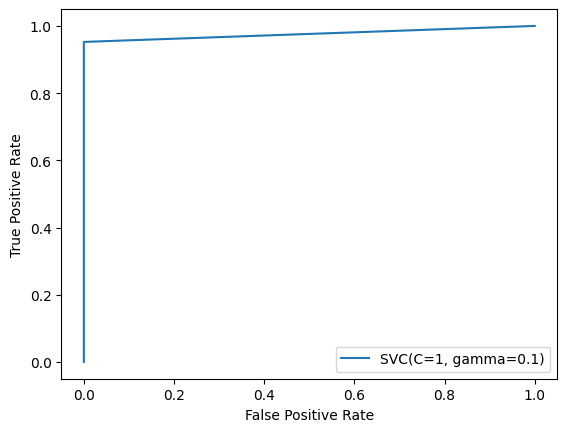

In [245]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = model)
rfcurve.plot()

In [246]:
import joblib

In [247]:
joblib.dump(model,'glass_model.pk1')

['glass_model.pk1']